In [3]:
import os

assert os.environ["CONDA_DEFAULT_ENV"]=='wakai'

In [4]:
# %load init_ipynb
import os
import sys
import matplotlib.pyplot as pl

sys.path.insert(0, '../code')
assert os.environ["CONDA_DEFAULT_ENV"] == 'wakai'

plotpar = {'axes.labelsize': 16,
           'font.size': 16,
           'legend.fontsize': 16,
           'xtick.labelsize': 16,
           'ytick.labelsize': 16,
           #'text.usetex': False,
           'xtick.direction': 'in',
           'ytick.direction': 'in'
           }
pl.rcParams.update(plotpar)


## Catalog

In [5]:
from catalog import CatalogDownloader

cd = CatalogDownloader(catalog_name="Hunt2023", catalog_type="cluster")
tabs = cd.get_tables_from_vizier(row_limit=-1)

Data url: https://vizier.u-strasbg.fr/viz-bin/VizieR?-source=J/A+A/673/A114
{'J/A+A/673/A114/clusters': 'Main catalogue (Table 3)',
 'J/A+A/673/A114/clustrej': 'Objects rejected from main catalogue',
 'J/A+A/673/A114/crossma': 'All (non-)xmatched clusters (Table B.1)',
 'J/A+A/673/A114/members': 'Member stars of clusters',
 'J/A+A/673/A114/membrej': 'Member stars of rejected clusters'}


In [9]:
df = tabs[0].to_pandas()
df_mem = tabs[1].to_pandas()
df_mem.head()

,Name,ID,GaiaDR3,inrt,Prob,RA_ICRS,DE_ICRS,pmRA,pmDE,Plx,Gmag,BPmag,RPmag,RV,_RA.icrs,_DE.icrs
0,Berkeley_75,247,2922223081654853376,1,1.000000,102.223502,-23.99,-0.1586,1.098,0.03417,18.350323,18.667510,17.903358,NaN,102.223503,-23.99
1,Berkeley_75,247,2922212842452945408,1,0.938590,102.432250,-24.06,-0.3253,1.330,0.18810,17.258419,17.573303,16.803411,NaN,102.432251,-24.06
2,Berkeley_75,247,2922223081654847232,1,1.000000,102.229326,-23.99,-0.2218,1.144,0.12890,13.789093,14.506675,12.970196,125.0,102.229327,-23.99
3,Berkeley_75,247,2922223081654846976,1,0.980979,102.222811,-23.99,-0.1123,1.209,0.08608,18.404047,18.720106,17.947610,NaN,102.222812,-23.99
4,Berkeley_75,247,2922223081654844800,1,1.000000,102.235485,-23.99,-0.1563,1.250,0.21950,17.927649,18.253078,17.472412,NaN,102.235486,-23.99


(-1000.0, 1000.0)

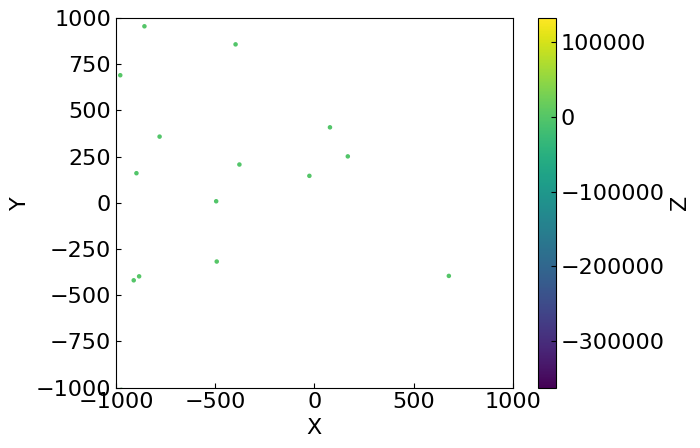

In [14]:
ax = df.plot(x="X", y='Y', c='Z', kind='scatter', marker='.')
ax.set_xlim(-1000,1000)
ax.set_ylim(-1000,1000)

In [2]:
from catalog import CatalogDownloader

cd = CatalogDownloader(catalog_name="CantatGaudin2020", catalog_type="cluster")
tabs = cd.get_tables_from_vizier(row_limit=-1)

{'J/A+A/633/A99/members': '*Members',
 'J/A+A/633/A99/table1': 'Mean parameters of the identified clusters'}


In [3]:
df = tabs[0].to_pandas()
df_mem = tabs[1].to_pandas()
df_mem.head()

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
0,52.756558,34.689531,221090730122510976,1.3799,-1.601,-1.205,NaN,13.058100,0.9138,0.8,ASCC_10,52.756566,34.689536
1,52.730263,34.341461,221065132117493376,1.6550,-2.455,-1.998,NaN,14.775700,1.2807,0.6,ASCC_10,52.730275,34.341469
2,52.684345,34.003600,220988819138630016,1.5876,-2.437,-0.949,NaN,10.883200,0.7241,0.1,ASCC_10,52.684358,34.003604
3,52.676106,34.733687,221094367958697088,1.5586,-1.532,-1.558,NaN,16.879801,1.8380,0.7,ASCC_10,52.676114,34.733694
4,52.712100,34.578004,221083888238423552,1.4173,-1.403,-1.242,NaN,17.980000,2.2854,0.6,ASCC_10,52.712107,34.578009


In [4]:
g=df_mem.groupby(by='Cluster')
top=g.count().sort_values(by='RV', ascending=False)
top

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,RV,Gmag,BP-RP,Proba,_RA.icrs,_DE.icrs
Cluster,,,,,,,,,,,,
NGC_3532,1981,1981,1981,1981,1981,1981,237,1981,1944,1981,1981,1981
Melotte_22,1061,1061,1061,1061,1061,1061,230,1061,1046,1061,1061,1061
NGC_2632,719,719,719,719,719,719,194,719,715,719,719,719
Stock_2,1209,1209,1209,1209,1209,1209,194,1209,1199,1209,1209,1209
NGC_6475,1555,1555,1555,1555,1555,1555,168,1555,1477,1555,1555,1555
...,...,...,...,...,...,...,...,...,...,...,...,...
UBC_27,65,65,65,65,65,65,0,65,65,65,65,65
Pfleiderer_3,73,73,73,73,73,73,0,73,72,73,73,73
FSR_0985,101,101,101,101,101,101,0,101,101,101,101,101


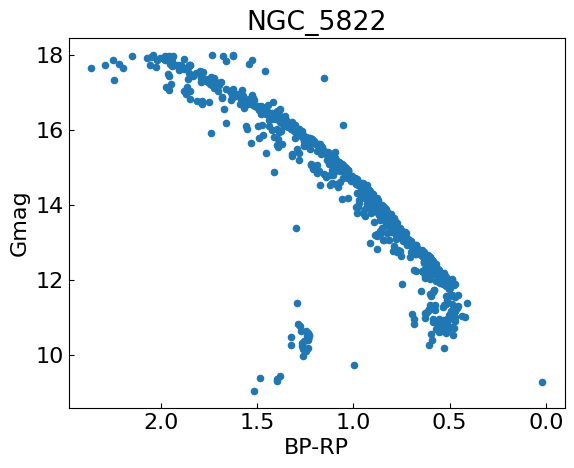

In [5]:
n=top.index[20]
idx=g.groups[n]
c=df_mem.loc[idx]
ax=c.plot.scatter(x='BP-RP',y='Gmag')
ax.set_title(n)
ax.invert_xaxis()

In [6]:
len(top)

1481

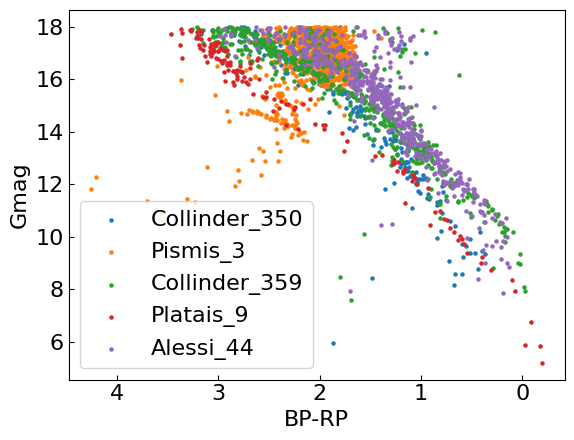

In [7]:
fig, ax = pl.subplots() 
for i,n in enumerate(top.index[50:100:10]):
    idx=g.groups[n]
    c=df_mem.loc[idx]
    _=c.plot.scatter(x='BP-RP',y='Gmag',ax=ax,label=n,c=f'C{i}',marker='.')
#     ax.set_title(n)
ax.invert_xaxis()

In [8]:
g=df_mem.groupby(by='Cluster')
top=g.count().sort_values(by='RV', ascending=False)
n=top.index[10]
idx=g.groups[n]
c=df_mem.loc[idx]

c = c.rename({
        "RA_ICRS": "ra",
        "DE_ICRS": "dec",
        "Plx": "parallax",
        "pmRA": "pmra",
        "pmDE": "pmdec",
        "RV": "radial_velocity"
    }, axis=1)
c.head()

,ra,dec,Source,parallax,pmra,pmdec,radial_velocity,Gmag,BP-RP,Proba,Cluster,_RA.icrs,_DE.icrs
316759,314.987490,45.379903,2163437188079965696,1.7087,5.684,7.316,NaN,17.3307,1.9434,0.1,NGC_6991,314.987455,45.379872
316760,313.460875,46.547150,2163416572234736000,1.7383,5.280,8.057,NaN,15.1425,1.3620,0.9,NGC_6991,313.460842,46.547116
316761,314.984837,45.377717,2163437153720227584,1.7847,5.505,6.964,-2.310423,13.3427,0.8393,0.1,NGC_6991,314.984803,45.377687
316762,313.331046,46.419758,2163414201412579840,1.6310,4.598,8.951,NaN,16.1383,1.5705,0.1,NGC_6991,313.331017,46.419719
316763,313.933259,48.245196,2167022283176983680,1.6486,5.927,8.348,NaN,15.9048,1.6822,1.0,NGC_6991,313.933221,48.245160


In [9]:
from astroquery.simbad import Simbad
result_table = Simbad.query_object(n)
result_table

MAIN_ID,RA,DEC,RA_PREC,DEC_PREC,COO_ERR_MAJA,COO_ERR_MINA,COO_ERR_ANGLE,COO_QUAL,COO_WAVELENGTH,COO_BIBCODE,SCRIPT_NUMBER_ID
,"""h:m:s""","""d:m:s""",,,mas,mas,deg,,,,
object,str13,str13,int16,int16,float32,float32,int16,str1,str1,object,int32
NGC 6991,20 54 29,+47 24.0,4,4,--,--,0,D,O,2020A&A...633A..99C,1


In [10]:
ra, dec = result_table.to_pandas()[['RA','DEC']].values[0]
ra, dec

('20 54 29', '+47 24.0')

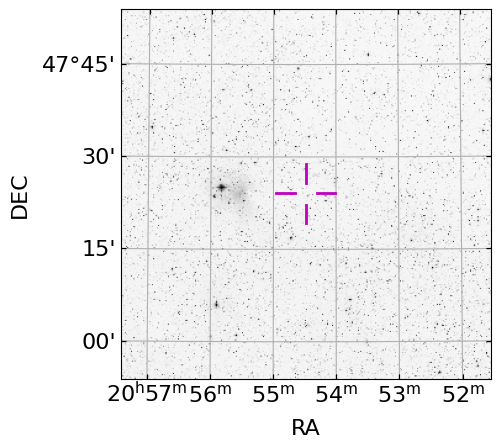

In [11]:
from astropy import units as u
from astropy.coordinates import SkyCoord
from astroplan.plots import plot_finder_image

fov_rad = 60*u.arcmin
obj_coord = SkyCoord(ra=ra, dec=dec, unit=(u.hourangle, u.deg))

#plot fov
ax, hdu = plot_finder_image(obj_coord, fov_radius=fov_rad, survey='DSS2 Red', reticle=True)

Text(0.5, 1.0, 'NGC_6991')

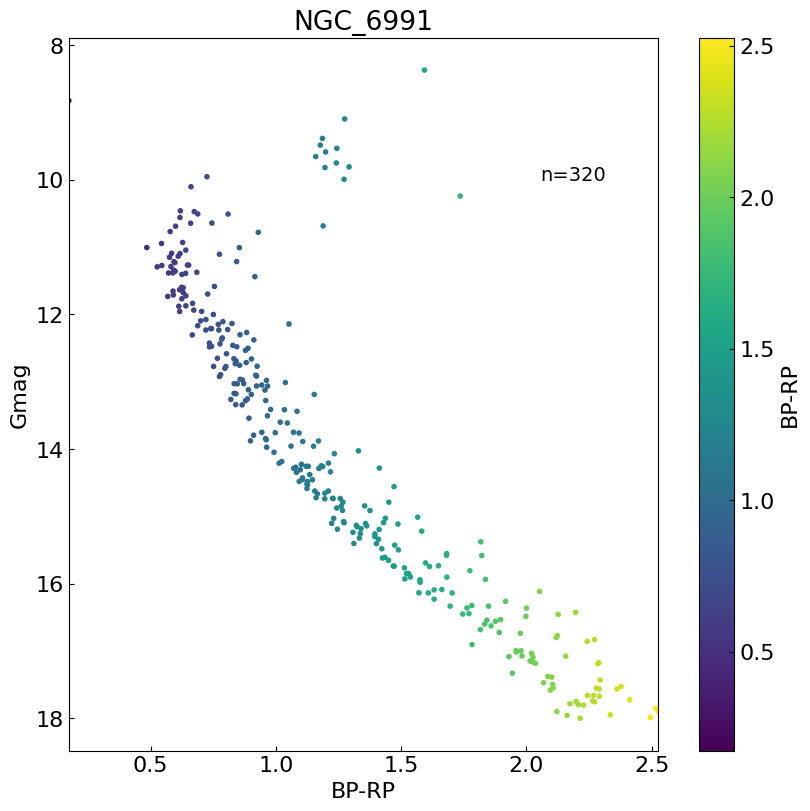

In [30]:
from catalog import plot_cmd

ax = plot_cmd(c, xaxis='BP-RP', yaxis='Gmag', color='BP-RP')
ax.set_title(n)

Text(0.5, 0.98, 'NGC_3532')

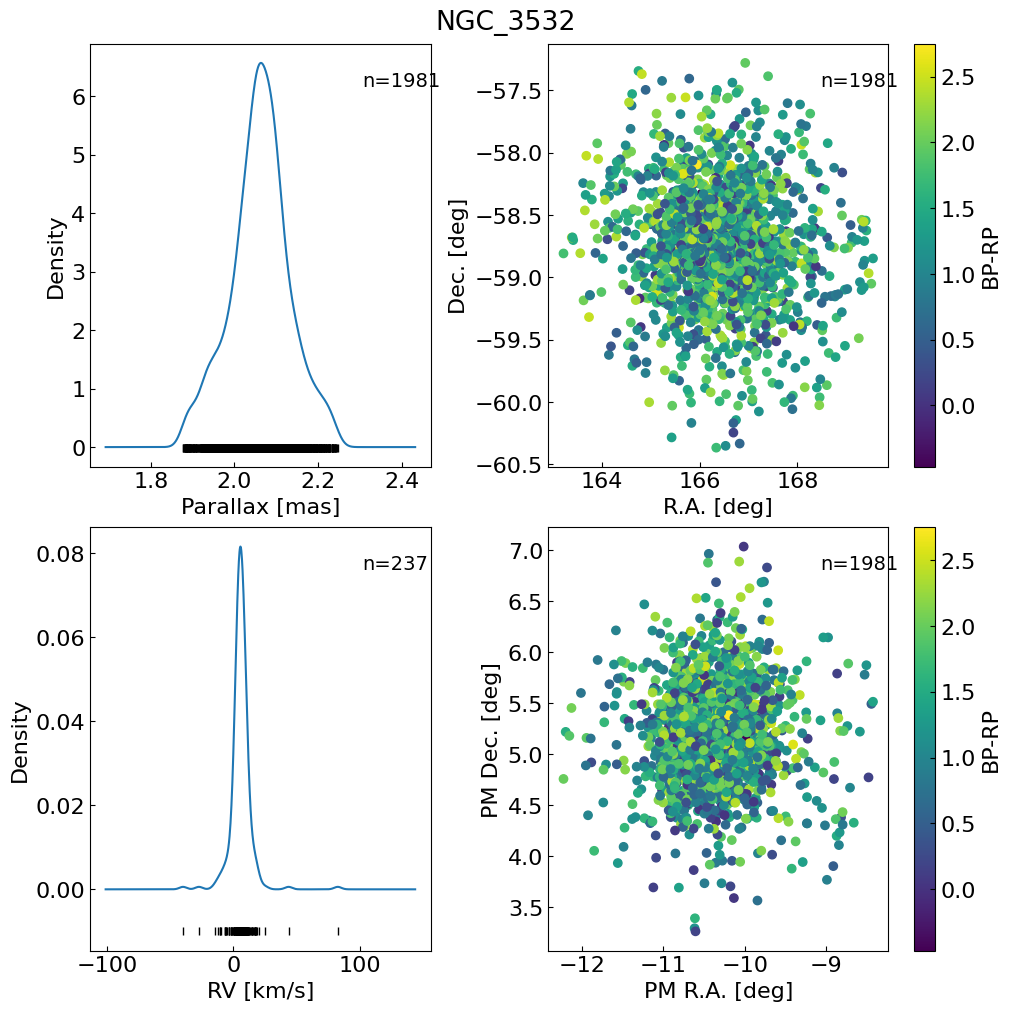

In [8]:
from catalog import plot_rdp_pmrv

fig = plot_rdp_pmrv(c, color='BP-RP')
fig.suptitle(n)

Text(0.5, 0.98, 'NGC_3532')

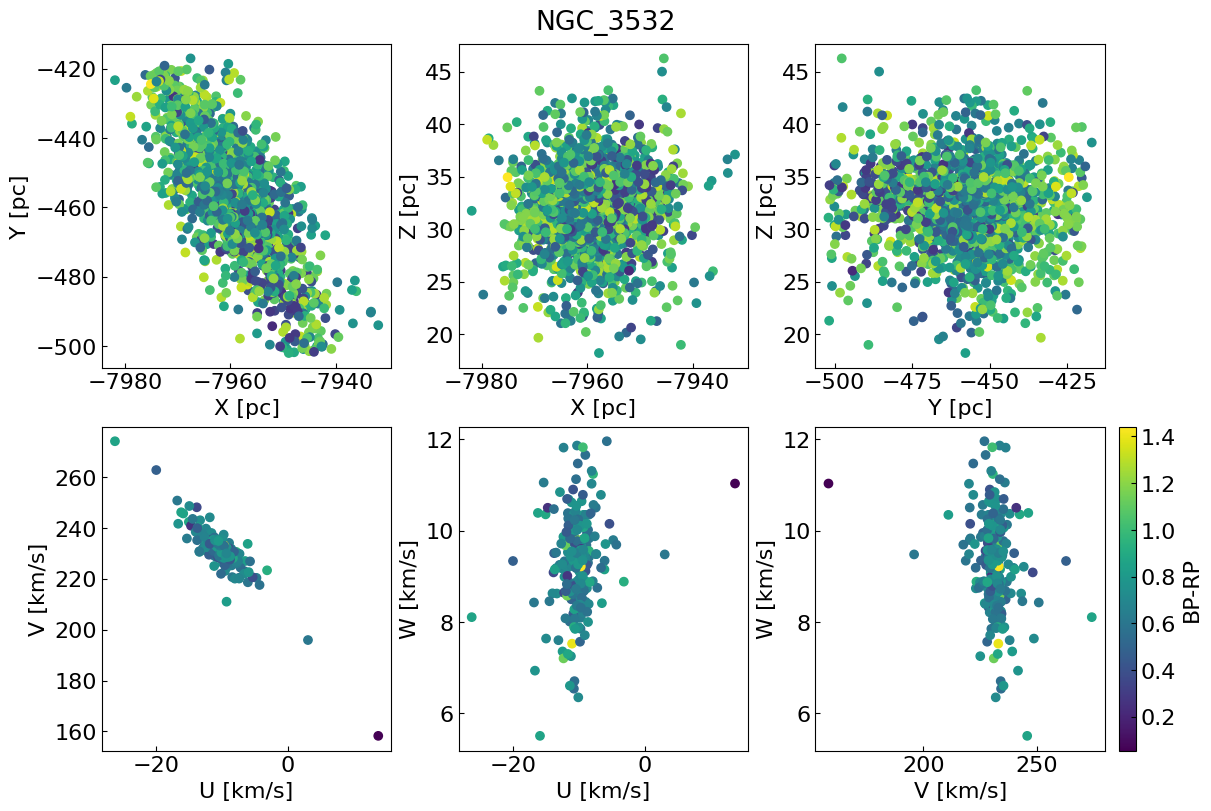

In [11]:
from catalog import plot_xyz_uvw

fig = plot_xyz_uvw(c, color='BP-RP')
fig.suptitle(n)